This file will focus on the cleaning and EDA of the dataset. 

I will be working with the dataset: phanalytix.csv from GitHub: https://ahariharan95.github.io/phish_analytics/. This data set has a total of 30883 entries and 31 columns. <br>

Each column represents different data, such as 'song', 'date', 'position', 'set', 'set_name', 'location', 'venue_name', 'tour', 'ratings', 'duration_song', 'duration_show', 'like_count_song', 'like_count_show', 'id_song', 'id_show', 'id_tour', 'artist', 'total_times_played', 'debut', 'year', 'gap', 'notes', 'debut_dummy', 'notes_dummy', 'cover_dummy', 'adj_gap', 'city', 'state', 'country', 'latitude', and 'longitude'. <br>

The data types for each column vary, including object (string), int64 (integer), float64 (floating-point number).<br> 

This dataset is cleaner than the output that I found scraping the Phish.net site, however the pitfall is the data only goes through 2017, so we are missing a crucial 7 years of magical music. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('phanalytix.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30883 entries, 0 to 30882
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   song                30883 non-null  object 
 1   date                30883 non-null  object 
 2   position            30883 non-null  int64  
 3   set                 30883 non-null  object 
 4   set_name            30883 non-null  object 
 5   location            30883 non-null  object 
 6   venue_name          30883 non-null  object 
 7   tour                30883 non-null  object 
 8   ratings             30883 non-null  float64
 9   duration_song       30880 non-null  object 
 10  duration_show       30645 non-null  object 
 11  like_count_song     30883 non-null  int64  
 12  like_count_show     30883 non-null  int64  
 13  id_song             30883 non-null  int64  
 14  id_show             30883 non-null  int64  
 15  id_tour             30883 non-null  int64  
 16  arti

In [4]:
# I want to look at the data - see what I need and what I don't need
df

song                  date  position set  \
0                Scarlet Begonias  1983-12-02T00:00:00Z         1   2   
1            Fire on the Mountain  1983-12-02T00:00:00Z         2   2   
2            In the Midnight Hour  1984-11-03T00:00:00Z         1   1   
3                Wild Child > Jam  1984-11-03T00:00:00Z         2   1   
4            Bertha > St. Stephen  1984-11-03T00:00:00Z         3   1   
...                           ...                   ...       ...  ..   
30878                      Carini  2017-01-15T00:00:00Z        15   2   
30879                 David Bowie  2017-01-15T00:00:00Z        16   2   
30880                  Harry Hood  2017-01-15T00:00:00Z        17   2   
30881  Slave to the Traffic Light  2017-01-15T00:00:00Z        18   E   
30882             Tweezer Reprise  2017-01-15T00:00:00Z        19   E   

      set_name                           location  \
0        Set 2                     Burlington, VT   
1        Set 2                     Burlington, VT   
2        Set 1                     Burlington, VT   
3        Set 1                     Burlington, VT   
4        Set 1                     Burlington, VT   
...        ...                                ...   
30878    Set 2  Riviera Maya, Quintana Roo Mexico   
30879    Set 2  Riviera Maya, Quintana Roo Mexico   
30880    Set 2  Riviera Maya, Quintana Roo Mexico   
30881   Encore  Riviera Maya, Quintana Roo Mexico   
30882   Encore  Riviera Maya, Quintana Roo Mexico   

                                           venue_name                   tour  \
0      Harris-Millis Cafeteria, University of Vermont              1983 Tour   
1      Harris-Millis Cafeteria, University of Vermont              1983 Tour   
2                   Slade Hall, University of Vermont              1984 Tour   
3                   Slade Hall, University of Vermont              1984 Tour   
4                   Slade Hall, University of Vermont              1984 Tour   
...                                               ...                    ...   
30878                              Barcelo Maya Beach  2017 Riviera Maya Run   
30879                              Barcelo Maya Beach  2017 Riviera Maya Run   
30880                              Barcelo Maya Beach  2017 Riviera Maya Run   
30881                              Barcelo Maya Beach  2017 Riviera Maya Run   
30882                              Barcelo Maya Beach  2017 Riviera Maya Run   

       ratings duration_song  ...                                  notes  \
0       4.2128         09:18  ...       \n\t\t\tphish debut.\n\t\t\t\t\t   
1       4.2128         07:53  ...       \n\t\t\tphish debut.\n\t\t\t\t\t   
2       3.2963         06:23  ...                   \n\t\t\t\n\t\t\t\t\t   
3       3.2963         05:20  ...                                    NaN   
4       3.2963         13:39  ...                                    NaN   
...        ...           ...  ...                                    ...   
30878   4.5560         08:48  ...  \n\t\t\t\n\t\t\t(shipwreck quote)\t\t   
30879   4.5560         13:36  ...  \n\t\t\t\n\t\t\t(shipwreck quote)\t\t   
30880   4.5560         12:23  ...  \n\t\t\t\n\t\t\t(shipwreck quote)\t\t   
30881   4.5560         11:01  ...                   \n\t\t\t\n\t\t\t\t\t   
30882   4.5560         04:04  ...                   \n\t\t\t\n\t\t\t\t\t   

       debut_dummy  notes_dummy  cover_dummy  adj_gap          city  \
0              1.0          1.0            1      NaN    Burlington   
1              1.0          1.0            1      NaN    Burlington   
2              0.0          0.0            1      3.0    Burlington   
3              NaN          NaN            1      NaN    Burlington   
4              NaN          NaN            1      NaN    Burlington   
...            ...          ...          ...      ...           ...   
30878          0.0          1.0            0      3.0  Riviera Maya   
30879          0.0          1.0            0     12.0  Riviera Maya   
30

I'd like to clean up some of these values a bit before working with them to see patterns and trends. Working through a bit of EDA <br>
 * Change Date to yyyy-mm-dd instead of what it is showing
 * Remove some columns
 * Remove the n\t\t\t\n\t\t\t thing in the notes column 
 * Fill missing values appropriately, for example: the Original Song Artist column, modify all NaNs to Phish. Not neccessarially NaN = 0 so, I want to provide as accurate an interpurtation as possible.  

In [8]:
df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')

In [12]:
notes_column = df['notes']
notes_column

0            phish debut
1            phish debut
2                       
3            phish debut
4            phish debut
              ...       
30878    shipwreck quote
30879    shipwreck quote
30880    shipwreck quote
30881                   
30882                   
Name: notes, Length: 30883, dtype: object

In [13]:
# Removing the \n\t\t\t\t's
# To replace the NaN values in the 'notes' column with "phish debut" and remove the parentheses
# these can use the fillna() and str.replace() methods in pandas.

df['notes'] = df['notes'].str.replace(r'\n\t+', '', regex=True).str.strip()
df['notes'] = df['notes'].fillna('phish debut').str.replace(r'\(|\)', '', regex=True).str.strip()
df['notes'] = df['notes'].str.replace(r'[^\w\s]', '', regex=True).str.strip()
df['notes'] = df['notes'].fillna('phish in rotation')
notes_column = df['notes']
notes_column

0            phish debut
1            phish debut
2                       
3            phish debut
4            phish debut
              ...       
30878    shipwreck quote
30879    shipwreck quote
30880    shipwreck quote
30881                   
30882                   
Name: notes, Length: 30883, dtype: object

In [14]:
# fill in the average of 'total_times_played' column with the average value

average_total_times_played = df['total_times_played'].mean()
df['total_times_played'] = df['total_times_played'].fillna(average_total_times_played)

In [15]:
# fill in the NaN values in the 'debut' column with the corresponding values from the 'year' column

df['debut'] = df['debut'].fillna(df['year'])

In [16]:
# lowercase all data

df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
df

song        date  position set set_name  \
0                scarlet begonias  1983-12-02         1   2    set 2   
1            fire on the mountain  1983-12-02         2   2    set 2   
2            in the midnight hour  1984-11-03         1   1    set 1   
3                wild child > jam  1984-11-03         2   1    set 1   
4            bertha > st. stephen  1984-11-03         3   1    set 1   
...                           ...         ...       ...  ..      ...   
30878                      carini  2017-01-15        15   2    set 2   
30879                 david bowie  2017-01-15        16   2    set 2   
30880                  harry hood  2017-01-15        17   2    set 2   
30881  slave to the traffic light  2017-01-15        18   e   encore   
30882             tweezer reprise  2017-01-15        19   e   encore   

                                location  \
0                         burlington, vt   
1                         burlington, vt   
2                         burlington, vt   
3                         burlington, vt   
4                         burlington, vt   
...                                  ...   
30878  riviera maya, quintana roo mexico   
30879  riviera maya, quintana roo mexico   
30880  riviera maya, quintana roo mexico   
30881  riviera maya, quintana roo mexico   
30882  riviera maya, quintana roo mexico   

                                           venue_name                   tour  \
0      harris-millis cafeteria, university of vermont              1983 tour   
1      harris-millis cafeteria, university of vermont              1983 tour   
2                   slade hall, university of vermont              1984 tour   
3                   slade hall, university of vermont              1984 tour   
4                   slade hall, university of vermont              1984 tour   
...                                               ...                    ...   
30878                              barcelo maya beach  2017 riviera maya run   
30879                              barcelo maya beach  2017 riviera maya run   
30880                              barcelo maya beach  2017 riviera maya run   
30881                              barcelo maya beach  2017 riviera maya run   
30882                              barcelo maya beach  2017 riviera maya run   

       ratings duration_song  ...            artist  total_times_played  \
0       4.2128         09:18  ...     grateful dead            3.000000   
1       4.2128         07:53  ...  diga rhythm band            2.000000   
2       3.2963         06:23  ...    wilson pickett            5.000000   
3       3.2963         05:20  ...               NaN          228.513329   
4       3.2963         13:39  ...               NaN          228.513329   
...        ...           ...  ...               ...                 ...   
30878   4.5560         08:48  ...             phish           90.000000   
30879   4.5560         13:36  ...             phish          471.000000   
30880   4.5560         12:23  ...             phish          371.000000   
30881   4.5560         11:01  ...             phish          233.000000   
30882   4.5560         04:04  ...             phish          274.000000   

            debut    year            notes  cover_dummy          city  \
0      1983-12-02  1983.0      phish debut            1    burlington   
1      1983-12-02  1983.0      phish debut            1    burlington   
2      1983-12-02  1984.0                             1    burlington   
3          1984.0  1984.0      phish debut            1    burlington   
4          1984.0  1984.0      phish debut            1    burlington   
...           ...     ...              ...          ...           ...   
30878  1997-02-17  2017.0  shipwreck quote            0  riviera maya   
30879  1986-10-31  2017.0  shipwreck quote            0  riviera maya   
30880  1985-10-30  2017.0  shipwreck quote            0  riviera maya   
30881  1984-12-01  2017.0                  

In [17]:
# Replace 'artist' NaNs with  'phish'

df['artist'] = df['artist'].str.strip().fillna('phish')
df

song        date  position set set_name  \
0                scarlet begonias  1983-12-02         1   2    set 2   
1            fire on the mountain  1983-12-02         2   2    set 2   
2            in the midnight hour  1984-11-03         1   1    set 1   
3                wild child > jam  1984-11-03         2   1    set 1   
4            bertha > st. stephen  1984-11-03         3   1    set 1   
...                           ...         ...       ...  ..      ...   
30878                      carini  2017-01-15        15   2    set 2   
30879                 david bowie  2017-01-15        16   2    set 2   
30880                  harry hood  2017-01-15        17   2    set 2   
30881  slave to the traffic light  2017-01-15        18   e   encore   
30882             tweezer reprise  2017-01-15        19   e   encore   

                                location  \
0                         burlington, vt   
1                         burlington, vt   
2                         burlington, vt   
3                         burlington, vt   
4                         burlington, vt   
...                                  ...   
30878  riviera maya, quintana roo mexico   
30879  riviera maya, quintana roo mexico   
30880  riviera maya, quintana roo mexico   
30881  riviera maya, quintana roo mexico   
30882  riviera maya, quintana roo mexico   

                                           venue_name                   tour  \
0      harris-millis cafeteria, university of vermont              1983 tour   
1      harris-millis cafeteria, university of vermont              1983 tour   
2                   slade hall, university of vermont              1984 tour   
3                   slade hall, university of vermont              1984 tour   
4                   slade hall, university of vermont              1984 tour   
...                                               ...                    ...   
30878                              barcelo maya beach  2017 riviera maya run   
30879                              barcelo maya beach  2017 riviera maya run   
30880                              barcelo maya beach  2017 riviera maya run   
30881                              barcelo maya beach  2017 riviera maya run   
30882                              barcelo maya beach  2017 riviera maya run   

       ratings duration_song  ...            artist  total_times_played  \
0       4.2128         09:18  ...     grateful dead            3.000000   
1       4.2128         07:53  ...  diga rhythm band            2.000000   
2       3.2963         06:23  ...    wilson pickett            5.000000   
3       3.2963         05:20  ...             phish          228.513329   
4       3.2963         13:39  ...             phish          228.513329   
...        ...           ...  ...               ...                 ...   
30878   4.5560         08:48  ...             phish           90.000000   
30879   4.5560         13:36  ...             phish          471.000000   
30880   4.5560         12:23  ...             phish          371.000000   
30881   4.5560         11:01  ...             phish          233.000000   
30882   4.5560         04:04  ...             phish          274.000000   

            debut    year            notes  cover_dummy          city  \
0      1983-12-02  1983.0      phish debut            1    burlington   
1      1983-12-02  1983.0      phish debut            1    burlington   
2      1983-12-02  1984.0                             1    burlington   
3          1984.0  1984.0      phish debut            1    burlington   
4          1984.0  1984.0      phish debut            1    burlington   
...           ...     ...              ...          ...           ...   
30878  1997-02-17  2017.0  shipwreck quote            0  riviera maya   
30879  1986-10-31  2017.0  shipwreck quote            0  riviera maya   
30880  1985-10-30  2017.0  shipwreck quote            0  riviera maya   
30881  1984-12-01  2017.0                  

In [18]:
# Checking for missing values
missing_values = df.isnull().sum()

print(missing_values)

song                  0
date                  0
position              0
set                   0
set_name              0
location              0
venue_name            0
tour                  0
ratings               0
duration_song         3
like_count_song       0
like_count_show       0
artist                0
total_times_played    0
debut                 0
year                  0
notes                 0
cover_dummy           0
city                  0
country               0
latitude              0
longitude             0
dtype: int64


In [19]:
# What's going on in the duration_song column

duration_song_column = df['duration_song']
duration_song_column

0        09:18
1        07:53
2        06:23
3        05:20
4        13:39
         ...  
30878    08:48
30879    13:36
30880    12:23
30881    11:01
30882    04:04
Name: duration_song, Length: 30883, dtype: object

Phish is pretty known for playing longer than normal songs, like we're talking 28 minute songs occasionally, but this is 3 songs out of 30880 so I'm not super concerned.

okay, this is looking pretty good. I'll save a copy to work with from now on. 

In [20]:
df.to_csv('phanalytix.1.csv', index=False)

Now that I've been able to clean up the data, let's run some EDA on this dataset, then work on visualizing the data and see where there are any patterns to disect

In [21]:
df.describe()

position       ratings  like_count_song  like_count_show  \
count  30883.000000  30883.000000     30883.000000     30883.000000   
mean      11.366869      3.828554         1.059094         7.208626   
std        6.899126      0.572210         3.579589        12.288515   
min        1.000000      1.166700         0.000000         0.000000   
25%        6.000000      3.458300         0.000000         1.000000   
50%       11.000000      3.882400         0.000000         3.000000   
75%       16.000000      4.260300         1.000000        10.000000   
max       51.000000      4.738300       138.000000       170.000000   

       total_times_played          year   cover_dummy      latitude  \
count        30883.000000  30883.000000  30883.000000  30883.000000   
mean           228.513329   1998.448208      0.239808     40.187546   
std            157.438059      8.634524      0.426973      4.658715   
min              0.000000   1983.000000      0.000000     20.553629   
25%             89.000000   1992.000000      0.000000     37.774929   
50%            210.000000   1995.000000      0.000000     40.712784   
75%            349.000000   2004.000000      0.000000     42.963360   
max            603.000000   2017.000000      1.000000     55.676097   

          longitude  
count  30883.000000  
mean     -81.991096  
std       28.958498  
min     -124.163673  
25%      -90.071532  
50%      -78.638179  
75%      -73.510126  
max      139.817410

The mean values for each attribute are as follows:
Position: 11.37
Ratings: 3.83
Like count for songs: 1.06
Like count for shows: 7.21
Total times played: 228.51
Year: 1998.45
Cover dummy: 0.24
Latitude: 40.19
Longitude: -81.99
The standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum values are also provided for each attribute.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30883 entries, 0 to 30882
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   song                30883 non-null  object 
 1   date                30883 non-null  object 
 2   position            30883 non-null  int64  
 3   set                 30883 non-null  object 
 4   set_name            30883 non-null  object 
 5   location            30883 non-null  object 
 6   venue_name          30883 non-null  object 
 7   tour                30883 non-null  object 
 8   ratings             30883 non-null  float64
 9   duration_song       30880 non-null  object 
 10  like_count_song     30883 non-null  int64  
 11  like_count_show     30883 non-null  int64  
 12  artist              30883 non-null  object 
 13  total_times_played  30883 non-null  float64
 14  debut               30883 non-null  object 
 15  year                30883 non-null  float64
 16  note

In [23]:
like_song = df['like_count_song']
like_song

0        3
1        3
2        0
3        4
4        1
        ..
30878    0
30879    1
30880    2
30881    0
30882    0
Name: like_count_song, Length: 30883, dtype: int64

In [24]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [25]:
from tabulate import tabulate

In [26]:
# Select the desired columns  
table_data = df[['date', 'duration_song', 'like_count_song', 'like_count_show']]

# Convert the DataFrame to a table format  
table = tabulate(table_data, headers='keys', tablefmt='psql')

# Print the table  
print(table)

+-------+------------+-----------------+-------------------+-------------------+
|       | date       | duration_song   |   like_count_song |   like_count_show |
|-------+------------+-----------------+-------------------+-------------------|
|     0 | 1983-12-02 | 09:18           |                 3 |                 7 |
|     1 | 1983-12-02 | 07:53           |                 3 |                 7 |
|     2 | 1984-11-03 | 06:23           |                 0 |                 3 |
|     3 | 1984-11-03 | 05:20           |                 4 |                 3 |
|     4 | 1984-11-03 | 13:39           |                 1 |                 3 |
|     5 | 1984-11-03 | 09:39           |                 0 |                 3 |
|     6 | 1984-11-03 | 09:39           |                 0 |                 3 |
|     7 | 1984-11-03 | 01:17           |                 0 |                 3 |
|     8 | 1984-11-03 | 17:52           |                 3 |                 3 |
|     9 | 1984-11-03 | 16:01

date: The date when the song or show was recorded or released.<br>
duration_song: The duration of the song in minutes and seconds.<br>
like_count_song: The number of likes received for the song.<br>
like_count_show: The number of likes received for the show.<br>
Each row in the table corresponds to a specific entry or data point. For example, the first row shows that on December 2, 1983, a song with a duration of 09 minutes and 18 seconds received 3 likes, and the associated show received 7 likes.

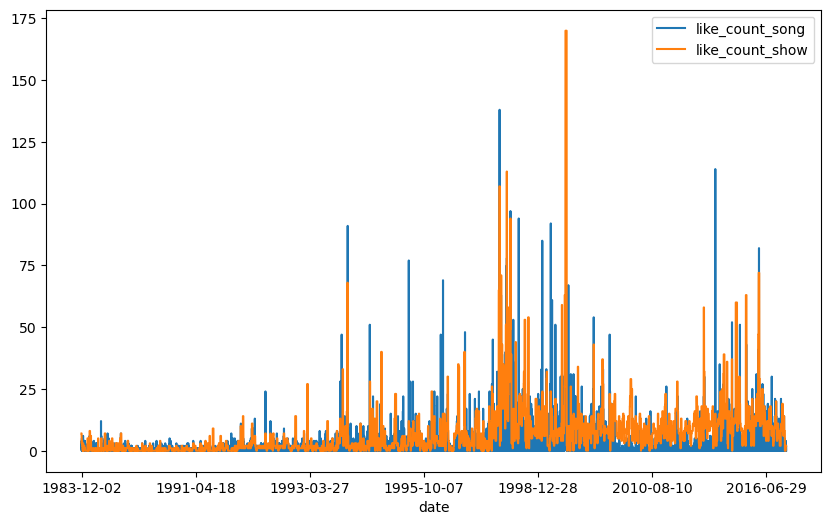

In [27]:
df.plot(x='date', y=['duration_song', 'like_count_song', 'like_count_show'], kind='line', figsize=(10, 6))
plt.show()

This plot shows the dates of tour ranges and the similarity in the tour show counts, how many shows were played during a certain year tour. As the band grows in popularity it sees more spikes in frequency. In like, with the soung counts, in 1997-1998 we see a big spike in song counts due to the number of original songs that the band is producing and pumping out into their shows. The lull that we see is also indiciative of the hiatus that the band took from 2004-2009. 

Year with the most debut songs: 1994.0
Debut shows in the most debut year:
11686    phish debut
11704    phish debut
11735    phish debut
11742    phish debut
11784    phish debut
            ...     
14348    phish debut
14371    phish debut
14391    phish debut
14394    phish debut
14397    phish debut
Name: notes, Length: 142, dtype: object


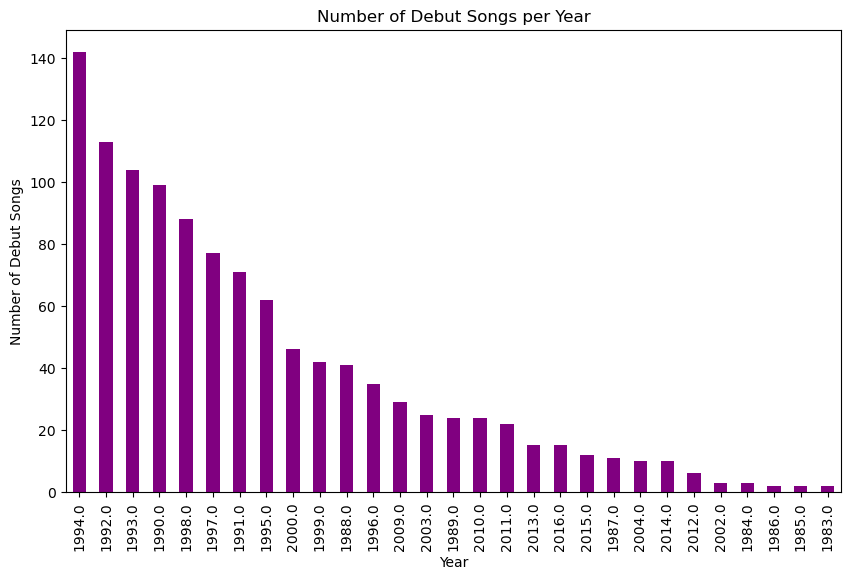

In [28]:
import matplotlib.pyplot as plt

# Filter only the debut songs  
debut_songs = df[df['notes'] == 'phish debut']

# Group by year and count the number of debut songs per year  
debut_counts = debut_songs['year'].value_counts()

# Get the year with the most debut songs  
most_debut_year = debut_counts.idxmax()

# Get the debut shows for the year with the most debut songs  
most_debut_shows = debut_songs[debut_songs['year'] == most_debut_year]['notes']

# Print the year and the corresponding debut shows  
print("Year with the most debut songs:", most_debut_year)
print("Debut shows in the most debut year:")
print(most_debut_shows)

# Create a bar plot of the debut song counts per year  
ax = debut_counts.plot(kind='bar', figsize=(10, 6), color='purple')
ax.bar(most_debut_year, debut_counts[most_debut_year], color='pink')

plt.xlabel('Year')
plt.ylabel('Number of Debut Songs')
plt.title('Number of Debut Songs per Year')
plt.show()

this plot is pretty cool too, decribing the amount of originally debuted phish songs. This trend makes sense in the sense that when the band first began they had a pretty small repertoire of original songs, and as the years go by, they build up their library to be debuting origninal songs up to 140 new songs by 1994! Incredible, but also not surprising. Phish is fairly unique in that they've been together for over 40 years, and are STILL putting out new music, and new albums almost every other year.  Of other bands of similar genre new music looks like this: <br>

Widespread Panic: The last new music released by Widespread Panic was their studio album "Street Dogs" in 2015.

Umphrey's McGee: The last new music released by Umphrey's McGee was their studio album "It's Not Us" in 2018.

The String Cheese Incident: The last new music released by The String Cheese Incident was their studio album "Believe" in 2
To compare, but not compare to The Rolling Stones, their last album came out in 2016. (but The Stones are about 20 years Phish senior. Not too shabby for guys in their 60's -80's!)017.

In [29]:
# Get the top 15 played songs  
top_songs = df['song'].value_counts().head(15)

# Print the top 15 played songs  
print("Top 15 Played Songs:")
print(top_songs)

Top 15 Played Songs:
song
you enjoy myself            525
mike's song                 476
possum                      448
chalk dust torture          447
run like an antelope        443
weekapaug groove            440
bouncing around the room    414
golgi apparatus             412
david bowie                 405
stash                       402
cavern                      401
hold your head up           391
tweezer                     390
suzy greenberg              383
divided sky                 369
Name: count, dtype: int64


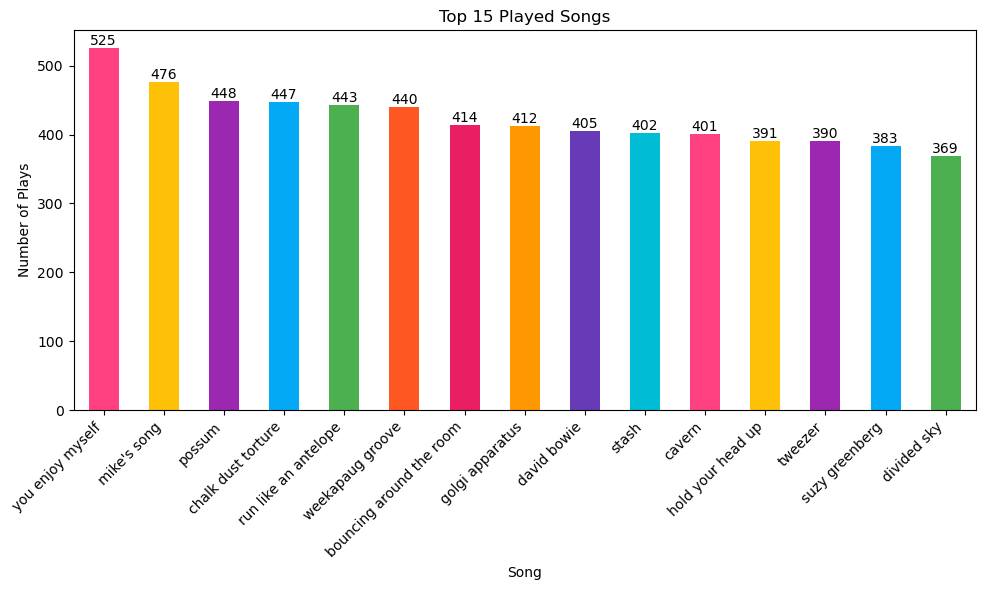

In [30]:
import matplotlib.pyplot as plt  
import seaborn as sns

# Define a fun color palette  
fun_colors = ["#FF4081", "#FFC107", "#9C27B0", "#03A9F4", "#4CAF50", "#FF5722", "#E91E63", "#FF9800", "#673AB7", "#00BCD4"]

# Get the top 15 played songs  
top_songs = df['song'].value_counts().head(15)

# Create a bar plot with song names on the bars using the fun color palette  
ax = top_songs.plot(kind='bar', figsize=(10, 6), color=fun_colors)

# Add labels to the bars  
for i, count in enumerate(top_songs):
    ax.text(i, count, str(count), ha='center', va='bottom')

# Customize the plot  
plt.xlabel('Song')
plt.ylabel('Number of Plays')
plt.title('Top 15 Played Songs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot  
plt.show()

In [32]:
pip install folium

   ---------------------------------------- 0.0/108.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/108.4 kB ? eta -:--:--
   ---------------------- ---------------- 61.4/108.4 kB 812.7 kB/s eta 0:00:01
   ---------------------------------------- 108.4/108.4 kB 1.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [33]:
# Now I want to show some fun tour data

import folium

In [34]:
# Filter the DataFrame for the year 1997  
filtered_df = df[df['year'] == 1997]

# Create a map centered on a specific location  
map = folium.Map(location=[40.7128, -74.0060], zoom_start=5)

# Iterate over the filtered data and add markers for each venue  
for index, row in filtered_df.iterrows():
    venue = row['venue_name']
    lat = row['latitude']
    lon = row['longitude']
    folium.Marker([lat, lon], popup=venue).add_to(map)

# Display the map  
map

In [35]:
import folium  
from folium.plugins import HeatMap

# Filter the DataFrame for the year 2010  
filtered_df = df[df['year'] == 1997]

# Create a map centered on a specific location  
map = folium.Map(location=[40.7128, -74.0060], zoom_start=5)

# Create a list of coordinates (latitude, longitude) for each venue  
venue_locations = filtered_df[['latitude', 'longitude']].values.tolist()

# Add markers for each venue  
for index, row in filtered_df.iterrows():
    venue = row['venue_name']
    lat = row['latitude']
    lon = row['longitude']
    folium.Marker([lat, lon], popup=venue).add_to(map)

# Create a HeatMap layer with the venue locations  
HeatMap(venue_locations).add_to(map)

# Display the map  
map

In [36]:
# Filter the DataFrame for the year 2010  Because this is the Year I started seeing Phish
filtered_df = df[df['year'] == 2010]

# Create a map centered on a specific location  
map = folium.Map(location=[40.7128, -74.0060], zoom_start=5)

# Iterate over the filtered data and add markers for each venue  
for index, row in filtered_df.iterrows():
    venue = row['venue_name']
    lat = row['latitude']
    lon = row['longitude']
    folium.Marker([lat, lon], popup=venue).add_to(map)

# Display the map  
map

In [37]:
# Filter the DataFrame for the year 2010  
filtered_df = df[df['year'] == 2010]

# Create a map centered on a specific location  
map = folium.Map(location=[40.7128, -74.0060], zoom_start=5)

# Create a list of coordinates (latitude, longitude) for each venue  
venue_locations = filtered_df[['latitude', 'longitude']].values.tolist()

# Add markers for each venue  
for index, row in filtered_df.iterrows():
    venue = row['venue_name']
    lat = row['latitude']
    lon = row['longitude']
    folium.Marker([lat, lon], popup=venue).add_to(map)

# Create a HeatMap layer with the venue locations  
HeatMap(venue_locations).add_to(map)

# Display the map  
map

legend:<br>
Blue/indigo = 1 show<br>
Green =  3 shows<br>
Red = >3 shows in location<br> 

this file got a little slow with the folium library running so I will continue features, modeling, optimization and augmentatio